In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklift.models import TwoModels
import lightgbm as lgb
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve
from imblearn.pipeline import Pipeline

%matplotlib inline

In [2]:
#Read the dataset
df = pd.read_csv("criteo-uplift-data.csv")

In [3]:
df.shape

(13979592, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [5]:
df.isnull().sum()

f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64

In [6]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

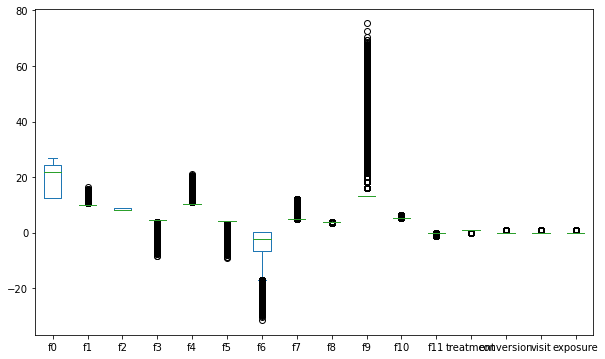

In [7]:
df.plot.box(figsize=(10,6))

In [8]:
df['treatment'].value_counts(normalize = True)

1    0.85
0    0.15
Name: treatment, dtype: float64

<AxesSubplot:xlabel='treatment', ylabel='count'>

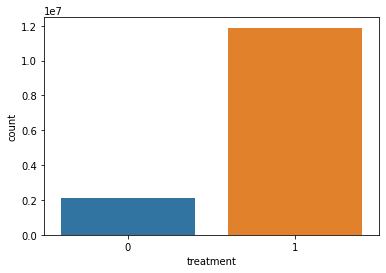

In [9]:
sns.countplot(x=df.treatment)

In [10]:
df['visit'].value_counts(normalize = True)

0    0.953008
1    0.046992
Name: visit, dtype: float64

<AxesSubplot:xlabel='visit', ylabel='count'>

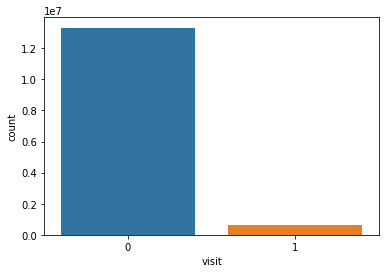

In [11]:
sns.countplot(x=df.visit)

In [12]:
df['conversion'].value_counts(normalize = True)

0    0.997083
1    0.002917
Name: conversion, dtype: float64

<AxesSubplot:xlabel='conversion', ylabel='count'>

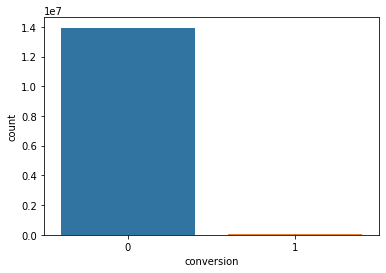

In [13]:
sns.countplot(x=df.conversion)

In [14]:
df['exposure'].value_counts(normalize = True)

0    0.969369
1    0.030631
Name: exposure, dtype: float64

<AxesSubplot:xlabel='exposure', ylabel='count'>

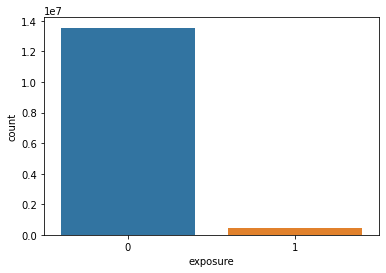

In [15]:
sns.countplot(x=df.exposure)

Text(0.5, 1.0, 'Feature Heatmap')

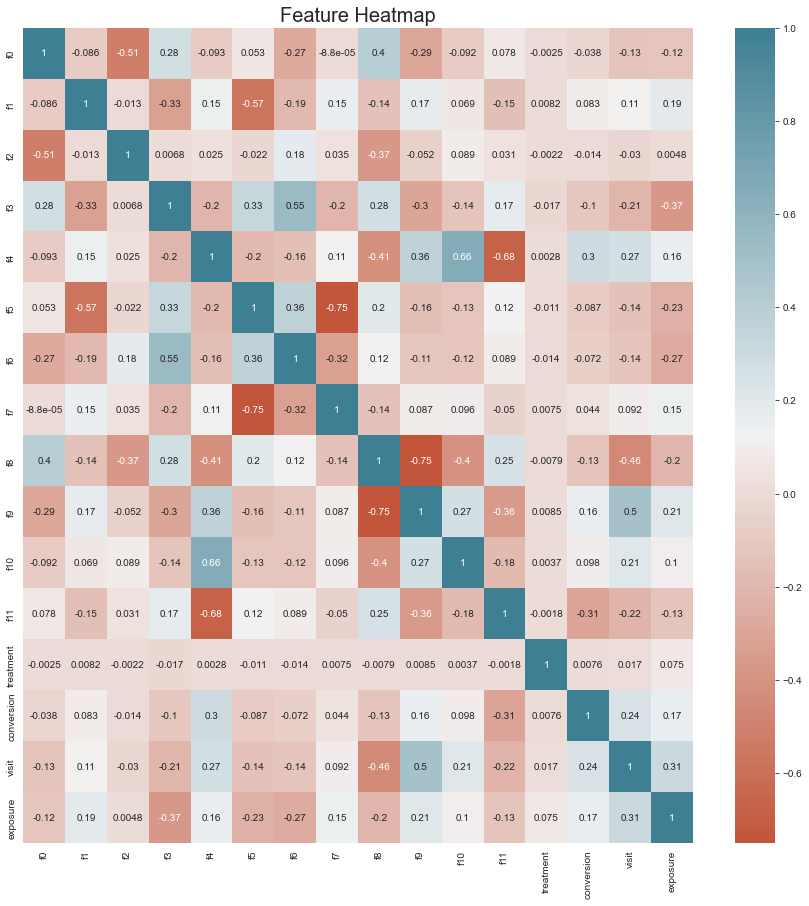

In [16]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,15))

sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True)
plt.title("Feature Heatmap", fontsize = 20)

In [17]:
pd.crosstab(df.treatment, df.visit, normalize='index')

visit,0,1
treatment,,
0,0.961799,0.038201
1,0.951457,0.048543


In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [21]:
#Given the treatment, exposure and visits, how is the conversion?
df.groupby(['treatment','exposure','visit']).agg({'conversion':['mean','sum','count']})

conversion                 
                               mean    sum     count
treatment exposure visit                            
0         0        0       0.000000      0   2016832
                   1       0.050721   4063     80105
1         0        0       0.000000      0  11055129
                   1       0.034259  13680    399314
          1        0       0.000000      0    250702
                   1       0.129745  23031    177510

In [22]:
users_to_remove = df[(df['treatment'] == 1 ) & (df['exposure']==0)]

#New df based on the objective of the notebook
df_ml = df.drop(users_to_remove.index).reset_index().drop(['index','treatment', 'visit'], axis = 1)
df.shape


(13979592, 16)

In [23]:
df_ml.shape

(2525149, 14)

In [24]:
X = df_ml.drop(columns=['conversion','exposure'])

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525149 entries, 0 to 2525148
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f0      float64
 1   f1      float64
 2   f2      float64
 3   f3      float64
 4   f4      float64
 5   f5      float64
 6   f6      float64
 7   f7      float64
 8   f8      float64
 9   f9      float64
 10  f10     float64
 11  f11     float64
dtypes: float64(12)
memory usage: 231.2 MB


In [26]:
treatment = df_ml['exposure']

In [27]:
y = df_ml['conversion']

In [28]:
models_results = {
    'approach': [],
    'uplift@30%': []}

In [29]:
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X,treatment,y, random_state=23, stratify=treatment, test_size=0.33)

In [30]:
df_ml.shape

(2525149, 14)

In [31]:
print(X_train.shape, X_test.shape, treatment_train.shape, treatment_test.shape, y_train.shape, y_test.shape)

(1691849, 12) (833300, 12) (1691849,) (833300,) (1691849,) (833300,)


In [32]:
treatment_model = CatBoostClassifier(random_state=23)
control_model = CatBoostClassifier(random_state=23)
tm = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [33]:
tm = tm.fit(X_train, y_train, treatment_train)

Learning rate set to 0.227502
0:	learn: 0.1816475	total: 362ms	remaining: 6m 2s
1:	learn: 0.0599327	total: 590ms	remaining: 4m 54s
2:	learn: 0.0254160	total: 787ms	remaining: 4m 21s
3:	learn: 0.0150122	total: 1.02s	remaining: 4m 15s
4:	learn: 0.0114165	total: 1.23s	remaining: 4m 5s
5:	learn: 0.0098181	total: 1.47s	remaining: 4m 4s
6:	learn: 0.0090759	total: 1.68s	remaining: 3m 58s
7:	learn: 0.0088094	total: 1.88s	remaining: 3m 53s
8:	learn: 0.0086058	total: 2.08s	remaining: 3m 49s
9:	learn: 0.0085479	total: 2.3s	remaining: 3m 47s
10:	learn: 0.0084665	total: 2.51s	remaining: 3m 45s
11:	learn: 0.0084063	total: 2.71s	remaining: 3m 43s
12:	learn: 0.0083632	total: 2.92s	remaining: 3m 41s
13:	learn: 0.0083332	total: 3.15s	remaining: 3m 41s
14:	learn: 0.0083007	total: 3.38s	remaining: 3m 42s
15:	learn: 0.0082936	total: 3.59s	remaining: 3m 40s
16:	learn: 0.0082769	total: 3.85s	remaining: 3m 42s
17:	learn: 0.0082607	total: 4.07s	remaining: 3m 41s
18:	learn: 0.0082210	total: 4.35s	remaining: 3m 

157:	learn: 0.0072492	total: 35.7s	remaining: 3m 10s
158:	learn: 0.0072447	total: 36s	remaining: 3m 10s
159:	learn: 0.0072376	total: 36.2s	remaining: 3m 9s
160:	learn: 0.0072304	total: 36.4s	remaining: 3m 9s
161:	learn: 0.0072254	total: 36.6s	remaining: 3m 9s
162:	learn: 0.0072171	total: 36.9s	remaining: 3m 9s
163:	learn: 0.0072117	total: 37.1s	remaining: 3m 9s
164:	learn: 0.0072068	total: 37.4s	remaining: 3m 9s
165:	learn: 0.0072004	total: 37.6s	remaining: 3m 8s
166:	learn: 0.0071945	total: 37.8s	remaining: 3m 8s
167:	learn: 0.0071904	total: 38s	remaining: 3m 8s
168:	learn: 0.0071891	total: 38.2s	remaining: 3m 7s
169:	learn: 0.0071879	total: 38.4s	remaining: 3m 7s
170:	learn: 0.0071858	total: 38.6s	remaining: 3m 7s
171:	learn: 0.0071841	total: 38.8s	remaining: 3m 6s
172:	learn: 0.0071784	total: 39s	remaining: 3m 6s
173:	learn: 0.0071722	total: 39.3s	remaining: 3m 6s
174:	learn: 0.0071714	total: 39.6s	remaining: 3m 6s
175:	learn: 0.0071696	total: 39.8s	remaining: 3m 6s
176:	learn: 0.00

314:	learn: 0.0066480	total: 1m 14s	remaining: 2m 41s
315:	learn: 0.0066439	total: 1m 14s	remaining: 2m 41s
316:	learn: 0.0066429	total: 1m 14s	remaining: 2m 41s
317:	learn: 0.0066404	total: 1m 15s	remaining: 2m 40s
318:	learn: 0.0066378	total: 1m 15s	remaining: 2m 40s
319:	learn: 0.0066339	total: 1m 15s	remaining: 2m 40s
320:	learn: 0.0066305	total: 1m 15s	remaining: 2m 40s
321:	learn: 0.0066273	total: 1m 16s	remaining: 2m 40s
322:	learn: 0.0066220	total: 1m 16s	remaining: 2m 39s
323:	learn: 0.0066162	total: 1m 16s	remaining: 2m 39s
324:	learn: 0.0066141	total: 1m 16s	remaining: 2m 39s
325:	learn: 0.0066073	total: 1m 17s	remaining: 2m 39s
326:	learn: 0.0066032	total: 1m 17s	remaining: 2m 39s
327:	learn: 0.0065974	total: 1m 17s	remaining: 2m 38s
328:	learn: 0.0065968	total: 1m 17s	remaining: 2m 38s
329:	learn: 0.0065915	total: 1m 17s	remaining: 2m 38s
330:	learn: 0.0065881	total: 1m 18s	remaining: 2m 38s
331:	learn: 0.0065829	total: 1m 18s	remaining: 2m 37s
332:	learn: 0.0065804	total:

466:	learn: 0.0061918	total: 1m 53s	remaining: 2m 9s
467:	learn: 0.0061903	total: 1m 53s	remaining: 2m 9s
468:	learn: 0.0061873	total: 1m 53s	remaining: 2m 8s
469:	learn: 0.0061842	total: 1m 54s	remaining: 2m 8s
470:	learn: 0.0061820	total: 1m 54s	remaining: 2m 8s
471:	learn: 0.0061792	total: 1m 54s	remaining: 2m 8s
472:	learn: 0.0061776	total: 1m 54s	remaining: 2m 7s
473:	learn: 0.0061755	total: 1m 54s	remaining: 2m 7s
474:	learn: 0.0061727	total: 1m 55s	remaining: 2m 7s
475:	learn: 0.0061705	total: 1m 55s	remaining: 2m 7s
476:	learn: 0.0061667	total: 1m 55s	remaining: 2m 6s
477:	learn: 0.0061629	total: 1m 55s	remaining: 2m 6s
478:	learn: 0.0061596	total: 1m 56s	remaining: 2m 6s
479:	learn: 0.0061582	total: 1m 56s	remaining: 2m 6s
480:	learn: 0.0061573	total: 1m 56s	remaining: 2m 5s
481:	learn: 0.0061572	total: 1m 56s	remaining: 2m 5s
482:	learn: 0.0061511	total: 1m 57s	remaining: 2m 5s
483:	learn: 0.0061480	total: 1m 57s	remaining: 2m 4s
484:	learn: 0.0061439	total: 1m 57s	remaining:

620:	learn: 0.0058658	total: 2m 28s	remaining: 1m 30s
621:	learn: 0.0058652	total: 2m 28s	remaining: 1m 30s
622:	learn: 0.0058613	total: 2m 29s	remaining: 1m 30s
623:	learn: 0.0058601	total: 2m 29s	remaining: 1m 30s
624:	learn: 0.0058586	total: 2m 29s	remaining: 1m 29s
625:	learn: 0.0058564	total: 2m 29s	remaining: 1m 29s
626:	learn: 0.0058520	total: 2m 30s	remaining: 1m 29s
627:	learn: 0.0058487	total: 2m 30s	remaining: 1m 29s
628:	learn: 0.0058468	total: 2m 30s	remaining: 1m 28s
629:	learn: 0.0058463	total: 2m 30s	remaining: 1m 28s
630:	learn: 0.0058442	total: 2m 30s	remaining: 1m 28s
631:	learn: 0.0058437	total: 2m 31s	remaining: 1m 28s
632:	learn: 0.0058419	total: 2m 31s	remaining: 1m 27s
633:	learn: 0.0058416	total: 2m 31s	remaining: 1m 27s
634:	learn: 0.0058387	total: 2m 31s	remaining: 1m 27s
635:	learn: 0.0058363	total: 2m 32s	remaining: 1m 27s
636:	learn: 0.0058314	total: 2m 32s	remaining: 1m 26s
637:	learn: 0.0058300	total: 2m 32s	remaining: 1m 26s
638:	learn: 0.0058291	total:

774:	learn: 0.0055591	total: 3m 5s	remaining: 54s
775:	learn: 0.0055580	total: 3m 6s	remaining: 53.7s
776:	learn: 0.0055546	total: 3m 6s	remaining: 53.5s
777:	learn: 0.0055513	total: 3m 6s	remaining: 53.3s
778:	learn: 0.0055486	total: 3m 6s	remaining: 53s
779:	learn: 0.0055467	total: 3m 7s	remaining: 52.8s
780:	learn: 0.0055451	total: 3m 7s	remaining: 52.5s
781:	learn: 0.0055443	total: 3m 7s	remaining: 52.3s
782:	learn: 0.0055411	total: 3m 7s	remaining: 52.1s
783:	learn: 0.0055390	total: 3m 8s	remaining: 51.8s
784:	learn: 0.0055385	total: 3m 8s	remaining: 51.6s
785:	learn: 0.0055361	total: 3m 8s	remaining: 51.3s
786:	learn: 0.0055351	total: 3m 8s	remaining: 51.1s
787:	learn: 0.0055337	total: 3m 9s	remaining: 50.9s
788:	learn: 0.0055325	total: 3m 9s	remaining: 50.6s
789:	learn: 0.0055304	total: 3m 9s	remaining: 50.4s
790:	learn: 0.0055291	total: 3m 9s	remaining: 50.2s
791:	learn: 0.0055272	total: 3m 10s	remaining: 49.9s
792:	learn: 0.0055268	total: 3m 10s	remaining: 49.7s
793:	learn: 0.

930:	learn: 0.0052958	total: 3m 51s	remaining: 17.1s
931:	learn: 0.0052932	total: 3m 51s	remaining: 16.9s
932:	learn: 0.0052922	total: 3m 51s	remaining: 16.7s
933:	learn: 0.0052917	total: 3m 52s	remaining: 16.4s
934:	learn: 0.0052897	total: 3m 52s	remaining: 16.2s
935:	learn: 0.0052835	total: 3m 52s	remaining: 15.9s
936:	learn: 0.0052828	total: 3m 52s	remaining: 15.7s
937:	learn: 0.0052802	total: 3m 53s	remaining: 15.4s
938:	learn: 0.0052792	total: 3m 53s	remaining: 15.2s
939:	learn: 0.0052773	total: 3m 53s	remaining: 14.9s
940:	learn: 0.0052757	total: 3m 54s	remaining: 14.7s
941:	learn: 0.0052738	total: 3m 54s	remaining: 14.4s
942:	learn: 0.0052720	total: 3m 54s	remaining: 14.2s
943:	learn: 0.0052705	total: 3m 54s	remaining: 13.9s
944:	learn: 0.0052702	total: 3m 55s	remaining: 13.7s
945:	learn: 0.0052671	total: 3m 55s	remaining: 13.4s
946:	learn: 0.0052647	total: 3m 55s	remaining: 13.2s
947:	learn: 0.0052625	total: 3m 55s	remaining: 12.9s
948:	learn: 0.0052600	total: 3m 56s	remaining:

90:	learn: 0.1504904	total: 6.03s	remaining: 1m
91:	learn: 0.1504654	total: 6.09s	remaining: 1m
92:	learn: 0.1504459	total: 6.16s	remaining: 1m
93:	learn: 0.1504310	total: 6.22s	remaining: 60s
94:	learn: 0.1504148	total: 6.29s	remaining: 60s
95:	learn: 0.1504048	total: 6.36s	remaining: 59.9s
96:	learn: 0.1503749	total: 6.45s	remaining: 1m
97:	learn: 0.1503540	total: 6.52s	remaining: 1m
98:	learn: 0.1503122	total: 6.62s	remaining: 1m
99:	learn: 0.1502686	total: 6.7s	remaining: 1m
100:	learn: 0.1502331	total: 6.78s	remaining: 1m
101:	learn: 0.1501889	total: 6.85s	remaining: 1m
102:	learn: 0.1501621	total: 6.92s	remaining: 1m
103:	learn: 0.1501295	total: 6.98s	remaining: 1m
104:	learn: 0.1501037	total: 7.06s	remaining: 1m
105:	learn: 0.1500754	total: 7.13s	remaining: 1m
106:	learn: 0.1500607	total: 7.21s	remaining: 1m
107:	learn: 0.1500400	total: 7.29s	remaining: 1m
108:	learn: 0.1500309	total: 7.38s	remaining: 1m
109:	learn: 0.1500132	total: 7.47s	remaining: 1m
110:	learn: 0.1499853	tota

252:	learn: 0.1465124	total: 18.2s	remaining: 53.8s
253:	learn: 0.1464879	total: 18.3s	remaining: 53.8s
254:	learn: 0.1464674	total: 18.4s	remaining: 53.7s
255:	learn: 0.1464441	total: 18.5s	remaining: 53.7s
256:	learn: 0.1464103	total: 18.6s	remaining: 53.7s
257:	learn: 0.1463920	total: 18.7s	remaining: 53.7s
258:	learn: 0.1463761	total: 18.8s	remaining: 53.7s
259:	learn: 0.1463458	total: 18.9s	remaining: 53.7s
260:	learn: 0.1463193	total: 18.9s	remaining: 53.7s
261:	learn: 0.1462970	total: 19s	remaining: 53.6s
262:	learn: 0.1462699	total: 19.1s	remaining: 53.6s
263:	learn: 0.1462446	total: 19.2s	remaining: 53.6s
264:	learn: 0.1462270	total: 19.3s	remaining: 53.6s
265:	learn: 0.1462055	total: 19.5s	remaining: 53.7s
266:	learn: 0.1461809	total: 19.6s	remaining: 53.7s
267:	learn: 0.1461513	total: 19.7s	remaining: 53.7s
268:	learn: 0.1461348	total: 19.8s	remaining: 53.7s
269:	learn: 0.1461177	total: 19.8s	remaining: 53.7s
270:	learn: 0.1460939	total: 19.9s	remaining: 53.6s
271:	learn: 0.

414:	learn: 0.1433793	total: 31.4s	remaining: 44.2s
415:	learn: 0.1433638	total: 31.5s	remaining: 44.2s
416:	learn: 0.1433413	total: 31.6s	remaining: 44.1s
417:	learn: 0.1433224	total: 31.6s	remaining: 44s
418:	learn: 0.1433058	total: 31.7s	remaining: 44s
419:	learn: 0.1432850	total: 31.8s	remaining: 43.9s
420:	learn: 0.1432691	total: 31.9s	remaining: 43.9s
421:	learn: 0.1432427	total: 32s	remaining: 43.9s
422:	learn: 0.1432254	total: 32.2s	remaining: 43.9s
423:	learn: 0.1432052	total: 32.3s	remaining: 43.9s
424:	learn: 0.1431837	total: 32.4s	remaining: 43.8s
425:	learn: 0.1431704	total: 32.5s	remaining: 43.8s
426:	learn: 0.1431519	total: 32.6s	remaining: 43.7s
427:	learn: 0.1431333	total: 32.6s	remaining: 43.6s
428:	learn: 0.1431116	total: 32.8s	remaining: 43.6s
429:	learn: 0.1431027	total: 32.9s	remaining: 43.6s
430:	learn: 0.1430811	total: 33s	remaining: 43.6s
431:	learn: 0.1430651	total: 33.1s	remaining: 43.5s
432:	learn: 0.1430455	total: 33.2s	remaining: 43.5s
433:	learn: 0.143025

574:	learn: 0.1407446	total: 44.7s	remaining: 33s
575:	learn: 0.1407266	total: 44.8s	remaining: 32.9s
576:	learn: 0.1407058	total: 44.8s	remaining: 32.9s
577:	learn: 0.1406951	total: 44.9s	remaining: 32.8s
578:	learn: 0.1406798	total: 45s	remaining: 32.7s
579:	learn: 0.1406700	total: 45s	remaining: 32.6s
580:	learn: 0.1406557	total: 45.1s	remaining: 32.5s
581:	learn: 0.1406386	total: 45.2s	remaining: 32.5s
582:	learn: 0.1406206	total: 45.3s	remaining: 32.4s
583:	learn: 0.1405942	total: 45.3s	remaining: 32.3s
584:	learn: 0.1405757	total: 45.4s	remaining: 32.2s
585:	learn: 0.1405595	total: 45.5s	remaining: 32.1s
586:	learn: 0.1405452	total: 45.6s	remaining: 32.1s
587:	learn: 0.1405290	total: 45.6s	remaining: 32s
588:	learn: 0.1405153	total: 45.7s	remaining: 31.9s
589:	learn: 0.1405038	total: 45.8s	remaining: 31.8s
590:	learn: 0.1404888	total: 45.8s	remaining: 31.7s
591:	learn: 0.1404743	total: 45.9s	remaining: 31.6s
592:	learn: 0.1404617	total: 46s	remaining: 31.6s
593:	learn: 0.1404481	

735:	learn: 0.1382786	total: 56s	remaining: 20.1s
736:	learn: 0.1382520	total: 56.1s	remaining: 20s
737:	learn: 0.1382356	total: 56.2s	remaining: 19.9s
738:	learn: 0.1382240	total: 56.2s	remaining: 19.9s
739:	learn: 0.1382142	total: 56.3s	remaining: 19.8s
740:	learn: 0.1382078	total: 56.4s	remaining: 19.7s
741:	learn: 0.1381919	total: 56.5s	remaining: 19.6s
742:	learn: 0.1381807	total: 56.5s	remaining: 19.6s
743:	learn: 0.1381692	total: 56.6s	remaining: 19.5s
744:	learn: 0.1381537	total: 56.7s	remaining: 19.4s
745:	learn: 0.1381365	total: 56.7s	remaining: 19.3s
746:	learn: 0.1381277	total: 56.8s	remaining: 19.2s
747:	learn: 0.1381102	total: 56.8s	remaining: 19.2s
748:	learn: 0.1381011	total: 56.9s	remaining: 19.1s
749:	learn: 0.1380980	total: 57s	remaining: 19s
750:	learn: 0.1380933	total: 57.1s	remaining: 18.9s
751:	learn: 0.1380831	total: 57.1s	remaining: 18.8s
752:	learn: 0.1380762	total: 57.2s	remaining: 18.8s
753:	learn: 0.1380545	total: 57.2s	remaining: 18.7s
754:	learn: 0.138031

895:	learn: 0.1361053	total: 1m 7s	remaining: 7.84s
896:	learn: 0.1360911	total: 1m 7s	remaining: 7.76s
897:	learn: 0.1360742	total: 1m 7s	remaining: 7.69s
898:	learn: 0.1360617	total: 1m 7s	remaining: 7.62s
899:	learn: 0.1360476	total: 1m 7s	remaining: 7.54s
900:	learn: 0.1360248	total: 1m 8s	remaining: 7.47s
901:	learn: 0.1360066	total: 1m 8s	remaining: 7.4s
902:	learn: 0.1359923	total: 1m 8s	remaining: 7.33s
903:	learn: 0.1359833	total: 1m 8s	remaining: 7.26s
904:	learn: 0.1359684	total: 1m 8s	remaining: 7.19s
905:	learn: 0.1359615	total: 1m 8s	remaining: 7.11s
906:	learn: 0.1359494	total: 1m 8s	remaining: 7.04s
907:	learn: 0.1359358	total: 1m 8s	remaining: 6.96s
908:	learn: 0.1359255	total: 1m 8s	remaining: 6.89s
909:	learn: 0.1359061	total: 1m 8s	remaining: 6.81s
910:	learn: 0.1358941	total: 1m 8s	remaining: 6.73s
911:	learn: 0.1358798	total: 1m 9s	remaining: 6.66s
912:	learn: 0.1358664	total: 1m 9s	remaining: 6.58s
913:	learn: 0.1358552	total: 1m 9s	remaining: 6.51s
914:	learn: 0

In [34]:
uplift_tm = tm.predict(X_test)

In [35]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_tm, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.5408


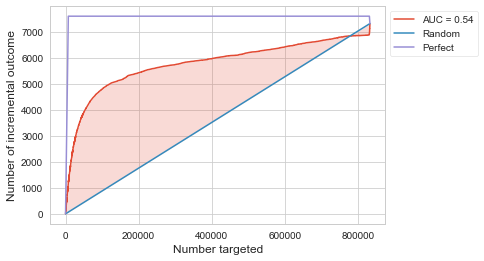

In [36]:
# with ideal Qini curve (red line)
# perfect=True

plot_qini_curve(y_test, uplift_tm, treatment_test, perfect=True);